**In The Name Of God**
<html>
<div>
  <span style="font-family: Poppins; font-size:30px; color: pink;"> University of Tehran <br/> Clustering <br/> CA3
</div>
<span style="font-family: Poppins; font-size:15pt; color: pink; vertical-align: middle;"> <br> Mobina Haghizadeh </span><br>
<span style="font-family: Poppins; font-size:15pt; color: pink; vertical-align: middle;"> 810100127 </span>

</html>

This notebook covers the topic of Clustering.

## Imports

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from keras.preprocessing.image import load_img, img_to_array
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import numpy as np
import os
import pandas as pd
from PIL import Image
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import homogeneity_score
import glob

 Set paths and parameters

In [77]:
feature_vectors = []
data_csv_path = '/content/drive/MyDrive/flower_images/flower_labels.csv'
image_dir = '/content/drive/MyDrive/flower_images'
target_size = (224, 224)

# Section 1: Preprocessing

First we load pre-trained VGG16 model without the top (fully connected) layers

In [78]:
base_model = VGG16(weights='imagenet', include_top=False)

# output = base_model.layers[-1].output
# base_model = Model(base_model.input, output)

Then we implement a function to extract features from an image:

In [79]:
def extract_features(image_array):

    features = base_model.predict(np.expand_dims(image_array, axis=0))
    features_flattened = features.flatten()  # Flatten the feature array

    return features_flattened

In [80]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

Load and preprocess images:

In [ ]:
files = os.listdir(image_dir)
files.sort()

for filename in files:
    if filename.endswith('.png'):
        image_path = os.path.join(image_dir, filename)
        image_array = preprocess_image(image_path)
        feature_vectors.append(extract_features(image_array))

## Question1:
The reason for feature extraction in the context of deep learning and image analysis, such as using models like VGG16, is to capture and utilize more abstract and meaningful representations of the input data beyond just the raw pixel values. <br>
some key reasons why we perform feature extraction instead of directly using pixel values:
1. Higher-level Representation

2. Discriminative Power

3. Dimensionality Reduction

4. Transfer Learning

5. Task Flexibility

## Question2:
Feature extraction from images involves transforming raw pixel data into more meaningful and informative representations that can be used for various tasks in computer vision and machine learning. Here are three common techniques for feature extraction from images:

1. Convolutional Neural Networks (CNNs):
CNNs are deep learning models designed to automatically learn hierarchical representations of features from images. They consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers. In CNNs, low-level features (such as edges and textures) are extracted in the early layers, and higher-level features (such as object parts and semantic information) are learned in deeper layers. The output of CNN layers can be used as feature vectors for tasks like image classification, object detection, and image segmentation.

2. Bag of Visual Words (BoVW):
BoVW is a traditional technique used in computer vision for image representation and feature extraction. It involves breaking down images into smaller patches or local regions, quantizing these regions into a set of visual words using clustering algorithms (e.g., k-means), and then representing each image as a histogram of these visual words. BoVW is commonly used in tasks like image retrieval and scene classification, where the frequency of visual words provides a compact representation of image content.

3. SIFT (Scale-Invariant Feature Transform) and SURF (Speeded-Up Robust Features):
SIFT and SURF are feature detection and description algorithms that identify distinctive keypoints in images and extract local feature descriptors around these keypoints. These algorithms are robust to changes in scale, rotation, and illumination, making them suitable for various computer vision tasks. The extracted keypoints and descriptors can be used to match and compare images, perform object recognition, and estimate geometric transformations between images.

## Question3:

Before feeding images into a model, the following preprocessing steps are typically performed:

1. Resizing: Ensure all images are resized to a consistent size required by the model (e.g., 224x224 pixels for VGG16).

2. Normalization: Normalize pixel values to a specific range (e.g., [0, 1] or [-1, 1]) to aid in convergence and stability during training.

3. Mean subtraction: Subtract the mean pixel value of the dataset from each image to center the data around zero.

4. Standardization: Standardize pixel values by subtracting the mean and dividing by the standard deviation to normalize the data distribution.

# Section2: Clustring

## K-Means

Implementing the K-means clustering:
First we initialize K-means model
Then we Fit the K-means model to the data
And finally we get cluster labels and centroids

In [82]:
def kmeans_clustering(X, n_clusters):

    kmeans = KMeans(n_clusters=n_clusters, n_init = 10)

    kmeans.fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    return labels, centroids

So we use the elbow method to determine the optimal number of clusters in K-means:

# Calculate WCSS for different values of K

In [ ]:
wcss = []
max_k = 12

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(feature_vectors)
    wcss.append(kmeans.inertia_)

Plot WCSS vs. Number of Clusters (K)

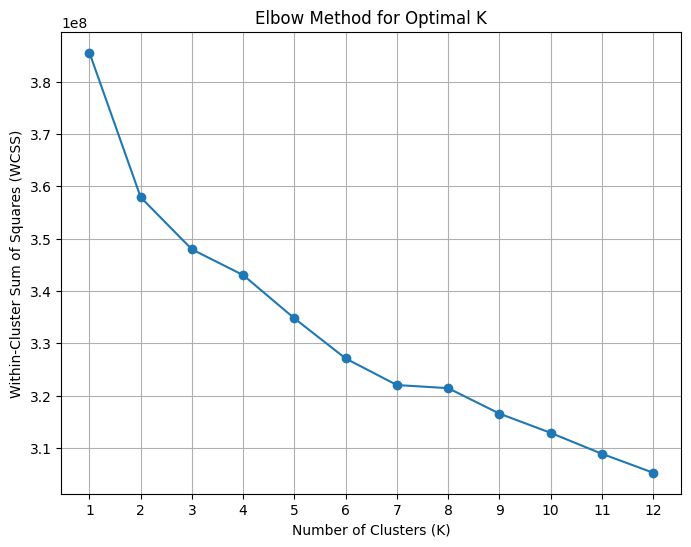

In [84]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, max_k + 1))
plt.grid(True)
plt.show()

In [ ]:
#kmeans_cluster_labels, kmeans_cluster_centers = kmeans_clustering(feature_vectors, n_clusters=10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## DBSCAN
Implementing the DBSCAN clustering:
First we initialize DBSCAN model
Then we Fit DBSCAN model to the data

In [85]:
def dbscan_clustering(X, eps, min_samples):

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    labels = dbscan.fit_predict(X)

    return labels

In [ ]:
#dbscan_cluster_labels = dbscan_clustering(feature_vectors, eps=80, min_samples=2)

## Question4:
### K-Means:

- Method: Iteratively partitions data into K clusters by minimizing the within-cluster sum of squares.
- Advantages:
Simple and computationally efficient.
Works well with globular (spherical) clusters.
- Disadvantages:
Requires specifying the number of clusters (K) in advance.
Sensitive to initial centroid selection and can converge to local optima.
Assumes clusters are of similar size and shape.

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

- Method: Identifies clusters based on density connectivity, without requiring the number of clusters (K) to be specified in advance.
- Advantages:
Automatically determines the number of clusters based on data density.
Can handle clusters of arbitrary shapes and sizes.
Robust to noise and outliers.
- Disadvantages:
Requires tuning of eps (neighborhood distance) and min_samples (density threshold) parameters.
Computationally more intensive for large datasets with high-dimensional data.

### Comparison:
- Flexibility:
K-Means requires specifying K in advance, while DBSCAN automatically determines clusters based on data density.
- Robustness:
DBSCAN is robust to noise and can identify outliers effectively.
- Computational Complexity:
K-Means is more computationally efficient for large datasets compared to DBSCAN.
- Parameter Sensitivity:
K-Means is sensitive to initial centroids, while DBSCAN is sensitive to eps and min_samples values.

## Question5:
Calculating the optimal number of clusters (K) in K-means clustering can be done using the "elbow method," which involves plotting the within-cluster sum of squares (WCSS) against different values of K and identifying the "elbow" point where the rate of decrease in WCSS starts to level off. The optimal K is typically chosen at the point where adding more clusters does not significantly reduce the WCSS.

## Question6:


# Section3: Dimensionality reduction


## Question7:
PCA (Principal Component Analysis) is a widely used technique in dimensionality reduction and data analysis. It works by transforming high-dimensional data into a lower-dimensional space while preserving as much variance (information) as possible.
1. PCA typically starts with standardizing the data by subtracting the mean and scaling to unit variance. This step ensures that all features contribute equally to the analysis.

2. PCA computes the covariance matrix of the standardized data. The covariance matrix provides insights into the relationships (correlations) between different features.

3. PCA performs eigenvalue decomposition (or singular value decomposition) on the covariance matrix to obtain the eigenvalues and corresponding eigenvectors.
The eigenvectors represent the principal components (new directions in the feature space), and the eigenvalues indicate the amount of variance explained by each principal component.

4. PCA selects the top principal components based on the eigenvalues, as they capture the most variance in the data.

5. Finally, PCA transforms the original data into the new lower-dimensional space defined by the selected principal components.


### Implementing PCA:
First we Create PCA instance
Then we fit PCA model and transform feature vectors

In [87]:
def apply_pca(label_vectors, n_components):

    pca = PCA(n_components=n_components)

    reduced_label_vectors = pca.fit_transform(feature_vectors)

    return reduced_label_vectors, pca

In [166]:
kmeans_reduced_label, kmeans_pca_model = apply_pca(feature_vectors, 2)
dbscan_reduced_label, dbscan_pca_model = apply_pca(feature_vectors, 2)

kmeans_reduced_array = np.array(kmeans_reduced_label)
dbscan_reduced_array = np.array(dbscan_reduced_label)

kmeans_cluster_labels, kmeans_cluster_centers = kmeans_clustering(kmeans_reduced_label, n_clusters=9)
dbscan_cluster_labels = dbscan_clustering(dbscan_reduced_label, eps=160, min_samples=2)


To compare the results of KMeans and DBSCAN clustering algorithms, we can use various evaluation metrics such as silhouette score, Dunn index, Davies-Bouldin index, or visual inspection of the clusters in a scatter plot.

Visualize the clusters in a scatter plot using the PCA reduced labels:

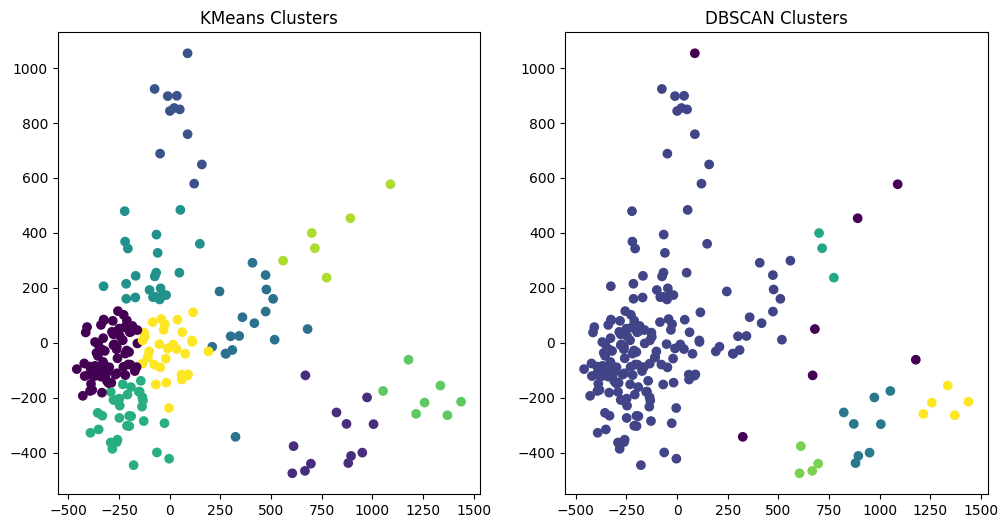

In [167]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(kmeans_reduced_label[:, 0], kmeans_reduced_label[:, 1], c=kmeans_cluster_labels, cmap='viridis')
plt.title('KMeans Clusters')

plt.subplot(1, 2, 2)
plt.scatter(dbscan_reduced_label[:, 0], dbscan_reduced_label[:, 1], c=dbscan_cluster_labels, cmap='viridis')
plt.title('DBSCAN Clusters')

plt.show()

## Question8:
The silhouette and homogeneity metrics are used to evaluate the performance of clustering algorithms.

- Silhouette score: The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a higher value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

- Homogeneity score: The homogeneity score measures whether each cluster contains only data points that are members of a single class. It ranges from 0 to 1, where a higher value indicates that each cluster contains data points from only one class.

## Question9:

### Silhouette score

In [168]:
kmeans_silhouette_score = metrics.silhouette_score(kmeans_reduced_array.reshape(kmeans_reduced_array.shape[0], -1), kmeans_cluster_labels)
dbscan_silhouette_score = metrics.silhouette_score(dbscan_reduced_array.reshape(dbscan_reduced_array.shape[0], -1), dbscan_cluster_labels)
print("K-Means silhouette score is: ", kmeans_silhouette_score)
print("DBSCAN silhouette score is: ", dbscan_silhouette_score)


K-Means silhouette score is:  0.41216718001762487
DBSCAN silhouette score is:  0.47742821657191536


### Homogeneity score

In [169]:
labels_data = pd.read_csv(os.path.join(data_csv_path))
true_labels = labels_data['label']


In [171]:
kmeans_homogeneity = homogeneity_score(true_labels, kmeans_cluster_labels)
dbscan_homogeneity = homogeneity_score(true_labels, dbscan_cluster_labels)

print("K-Means Homogeneity: ", kmeans_homogeneity)
print("DBSCAN Homogeneity: ", dbscan_homogeneity)

K-Means Homogeneity:  0.4544843560228892
DBSCAN Homogeneity:  0.15756128252145368


## Question10:
To improve the performance of the DBSCAN and K-means models, you can consider the following strategies:

- Optimizing Parameters:
For DBSCAN, tuning the eps (maximum distance between two samples for them to be considered as in the same neighborhood) and min_samples (the minimum number of samples in a neighborhood for a point to be considered as a core point) parameters can significantly impact clustering results.
For K-means, tuning the number of clusters k can improve the quality of clustering, as choosing an optimal value for k is crucial for better performance.

- Feature Scaling:
Standardizing or normalizing the features can help improve the performance of both algorithms. This ensures that all features contribute equally to the clustering process.

- Handling Outliers:
DBSCAN is sensitive to outliers. Removing outliers or applying techniques to detect and handle outliers can enhance the performance of the model.
For K-means, consider removing outliers before applying the algorithm to prevent them from affecting the centroid calculation.

- Dimensionality Reduction:
Implementing dimensionality reduction techniques such as PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding) can help reduce noise and improve clustering results.

- Ensemble Clustering:
Utilizing ensemble clustering techniques, such as combining multiple clustering algorithms or results, can lead to more robust clustering outcomes.

- Evaluation Metrics:
Utilize evaluation metrics like silhouette score and homogeneity score to compare different clustering solutions and fine-tune the model parameters accordingly.